In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('classify_3.csv',encoding="gbk")

In [3]:
data.head()

,date,time,日前电价,直调负荷,联络线受电负荷,风电负荷,光伏总加,自备机组总加,地方电厂发电总加,直调公用,正备用,负备用,quarter
0,2022/1/1,0:15,279.0,60624.3,10030.0,8817.99,0.0,4815,8140,36961.31,18392.6,8051.86,1
1,2022/1/1,0:30,277.0,60527.7,9443.0,8895.40,0.0,4815,8140,37374.30,17979.7,8464.77,2
2,2022/1/1,0:45,277.4,59883.2,9206.0,8969.26,0.0,4815,8140,36892.94,18461.1,7983.40,3
3,2022/1/1,1:00,276.0,59625.4,8969.0,9038.97,0.0,4815,8140,36802.43,18551.6,7892.89,4
4,2022/1/1,1:15,275.0,59367.6,8732.0,9104.96,0.0,4815,8140,36715.64,18638.4,7806.09,5


In [4]:
f1 = data['日前电价']
f2 = data['直调负荷']
f3 = data['联络线受电负荷']
f4 = data['风电负荷']
f5 = data['光伏总加']
f6 = data['直调公用']
f7 = data['正备用']
f8 = data['负备用']
f9 = data['quarter']

In [5]:
length=len(f1)#给定变量值
lookBack = 7*96
pred_num = 1
train_num = length-lookBack-pred_num+1
train_size = 62*96
valid_size = 10*96
test_size = 4*96
size=train_size+valid_size

In [6]:
def createSamples_X(dataset, lookBack, pred_num,day):#取前n天对应点的电价数据
    dataX = np.zeros((1,day)) 
    for i in range(len(dataset)-lookBack-pred_num+1):
        sample = []
        for j in range(day):
            sample_X = dataset[(i+j*96):(i+j*96+1), :]
            sample.append(sample_X)
        sample = np.array(sample).reshape(1,-1)
        dataX = np.vstack((dataX,sample)) 
    dataX = dataX[1:(len(dataset)-lookBack-pred_num+2), :]
    dataX = np.array(dataX)
    dataX = np.reshape(dataX, (dataX.shape[0], dataX.shape[1])) #三维到二维
    return dataX

In [7]:
#取目标值Y或取当点特征
def createSamples_Y(dataset, lookBack, pred_num):
    dataY = []
    for i in range(len(dataset)-lookBack-pred_num+1):
        sample_Y = dataset[(i+lookBack):(i + lookBack+pred_num), :]
        dataY.append(sample_Y)
    dataY = np.array(dataY)  # (N, 1)
    dataY = np.reshape(dataY, (dataY.shape[0], dataY.shape[1]))
    return dataY

In [8]:
#取连续特征值
def createSamples_continuous(dataset, lookBack, pred_num,front, lenthh):
    dataX = []
    for i in range(len(dataset)-lookBack-pred_num+1):
        sample_X = dataset[(i+front):(i+front+lenthh), :]
        dataX.append(sample_X)
    dataX = np.array(dataX)
    dataX = np.reshape(dataX, (dataX.shape[0], dataX.shape[1]))
    return dataX

In [9]:
#划分特征与目标
traffic_target = createSamples_Y(f1.values.reshape(-1, 1), lookBack, pred_num)
traffic_feature_2 = createSamples_Y(f2.values.reshape(-1, 1),lookBack, pred_num) 
traffic_feature_3 = createSamples_Y(f3.values.reshape(-1, 1),lookBack, pred_num)
traffic_feature_4 = createSamples_continuous(f4.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17) 
traffic_feature_5 = createSamples_continuous(f5.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)  
traffic_feature_6 = createSamples_continuous(f6.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)
traffic_feature_7 = createSamples_continuous(f7.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)
traffic_feature_8 = createSamples_continuous(f8.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)
traffic_feature_9 = createSamples_Y(f9.values.reshape(-1, 1),lookBack, pred_num)

traffic_feature_1 = createSamples_X(f1.values.reshape(-1, 1),lookBack, pred_num,6)
traffic_feature_10 = createSamples_continuous(f1.values.reshape(-1, 1),lookBack, pred_num,lookBack-16-96*3,17) 



traffic_feature = np.hstack((traffic_feature_1,traffic_feature_2,traffic_feature_3,traffic_feature_4,
                             traffic_feature_5,traffic_feature_6,traffic_feature_7,traffic_feature_8,
                             traffic_feature_9,traffic_feature_10                          
                            ))


In [10]:
#训练、验证、测试集
y_train = traffic_target[0:train_size,:]
y_valid = traffic_target[train_size:size,:]
y_test = traffic_target[size:train_num,:]
X_train=traffic_feature[0:train_size,:]
X_valid=traffic_feature[train_size:size,:]
X_test=traffic_feature[size:train_num,:]

y_train,y_valid,y_test,X_train,X_valid,X_test

(array([[311.  ],
        [294.  ],
        [277.38],
        ...,
        [682.56],
        [666.8 ],
        [649.56]]),
 array([[324.89],
        [327.51],
        [330.  ],
        [329.24],
        [330.55],
        [330.72],
        [330.49],
        [329.55],
        [330.  ],
        [328.95],
        [329.13],
        [327.72],
        [326.91],
        [326.91],
        [325.98],
        [325.03],
        [327.47],
        [328.98],
        [330.68],
        [333.76],
        [340.9 ],
        [351.22],
        [378.  ],
        [382.4 ],
        [382.  ],
        [404.63],
        [439.15],
        [388.22],
        [338.98],
        [333.59],
        [332.6 ],
        [326.72],
        [326.69],
        [317.49],
        [308.07],
        [300.34],
        [282.  ],
        [220.  ],
        [173.  ],
        [139.  ],
        [113.  ],
        [ 95.34],
        [ 70.57],
        [ 68.59],
        [ 88.36],
        [ 70.  ],
        [-80.  ],
        [-80.  ],
        [-80.

In [11]:
import xgboost as xgb
from sklearn.metrics import r2_score, auc
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_xgb = model.predict(X_test)
#acc=y_test['f1']
#print( r2_score(acc, y_pred) )
print(y_xgb)

[ 413.71304    383.35922    362.39447    323.33405    320.69946
  325.13977    310.5226     302.69882    278.53256    267.9476
  267.4799     267.7049     261.5823     250.62979    257.87595
  260.63498    266.22955    257.4146     263.0433     258.16867
  313.29495    317.8178     392.5058     391.29645    422.2074
  443.2212     469.89462    433.528      437.19696    439.0809
  446.18744    482.51788    499.40796    502.33365    512.0041
  491.9839     476.76993    452.72256    397.25705    399.30167
  404.0579     391.71487    396.97324    390.70953    384.25888
  371.58328    341.86417    302.64734    306.941      335.4297
  320.50037    303.04852    299.66602    298.65494    308.40833
  306.5978     331.8609     340.72528    335.31134    342.27637
  335.25735    391.5882     417.82144    421.6382     413.40204
  433.79013    432.72247    467.09796    480.56927    523.936
  593.45294    602.0052     639.18665    639.0274     618.60345
  580.58734    574.4486     540.2146     536.89

In [12]:
test0=pd.read_excel("true.xlsx",encoding='ISO-8859-1')

acc=test0['日前电价']

In [13]:
print( r2_score(acc, y_xgb))

0.5812412845285795


In [14]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print(r2_score(acc, y_xgb))
print ('均方差',mean_squared_error(acc,y_xgb))
print ('绝对差',mean_absolute_error(acc,y_xgb))
print ('解释度',explained_variance_score(acc,y_xgb))

0.5812412845285795
均方差 15018.160449698631
绝对差 95.91865214323006
解释度 0.7369594692440808


In [15]:
mape=np.abs((acc-y_xgb)/((acc+y_xgb)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.8726169408579038


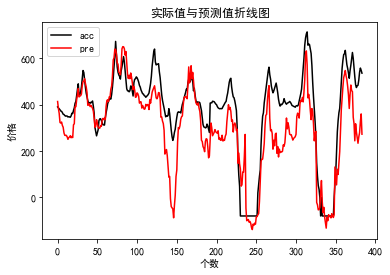

In [16]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#y_pred 预测值数据
plt.plot(acc,color=(0,0,0),label="acc") #颜色表示
plt.plot(y_xgb,color="r",label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [17]:
result=list(y_xgb)
result=list(map(lambda x: x + 1, result))
test0["日前电价"]=result
test0.to_csv("pre_xgb1.csv", index=False)

In [18]:
from sklearn.ensemble import AdaBoostRegressor
AdaBoost = AdaBoostRegressor()
AdaBoost.fit(X_train, y_train)
# 回归测试集预测
y_Ada = AdaBoost.predict(X_test) 


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
test0=pd.read_excel("true.xlsx",encoding='ISO-8859-1')
acc=test0['日前电价']
mse = mean_squared_error(acc, y_Ada)
#print("预测结果", y_Ada)
print("均方误差 = ",round(mse,2))


均方误差 =  12407.03


In [21]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print( r2_score(acc, y_Ada))
print ('均方差',mean_squared_error(acc,y_Ada))
print ('绝对差',mean_absolute_error(acc,y_Ada))
print ('解释度',explained_variance_score(acc,y_Ada))

0.6540486437531328
均方差 12407.032460345034
绝对差 91.6802195829414
解释度 0.7404105932254217


In [23]:
mape=np.abs((acc-y_Ada)/((acc+y_Ada)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.6481964569316122


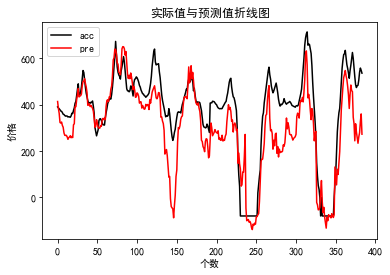

In [39]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#y_pred 预测值数据
plt.plot(acc,color=(0,0,0),label="acc") #颜色表示
plt.plot(y_xgb,color="r",label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
# 使用决策树回归模型
dec_regressor = DecisionTreeRegressor()
dec_regressor.fit(X_train, y_train)
y_dec = dec_regressor.predict(X_test)
mse = mean_squared_error(acc, y_dec)
print("决策树均方误差 =",round(mse,2))

决策树均方误差 = 23445.67


In [25]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print ('均方差',mean_squared_error(acc,y_dec))
print ('绝对差',mean_absolute_error(acc,y_dec))
print ('解释度',explained_variance_score(acc,y_dec))

均方差 23445.667424479165
绝对差 112.96848958333334
解释度 0.4774536375032362


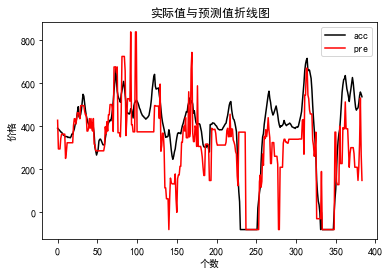

In [26]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#y_pred 预测值数据
plt.plot(acc,color=(0,0,0),label="acc") #颜色表示
plt.plot(y_dec,color="r",label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [27]:
mape=np.abs((acc-y_dec)/((acc+y_dec)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.5149343387033642


In [29]:

from sklearn.ensemble import GradientBoostingRegressor
gbdt = GradientBoostingRegressor()
#y_train = y_train.values.ravel()
gbdt.fit(X_train, y_train.astype('int'))

y_gbdt = gbdt.predict(X_test)
#acc=test['price1']

C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print( r2_score(acc, y_gbdt))
print ('均方差',mean_squared_error(acc,y_gbdt))
print ('绝对差',mean_absolute_error(acc,y_gbdt))
print ('解释度',explained_variance_score(acc,y_gbdt))

0.6443348269055724
均方差 12755.404099204936
绝对差 91.8997122700361
解释度 0.8376621603831111


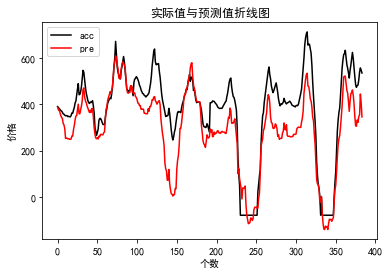

In [32]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#y_pred 预测值数据
plt.plot(acc,color=(0,0,0),label="acc") #颜色表示
plt.plot(y_gbdt,color="r",label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [34]:
mape=np.abs((acc-y_gbdt)/((acc+y_gbdt)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.44314093693219014


In [35]:
import catboost
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import r2_score, auc
model = catboost.CatBoostRegressor()
model.fit(X_train, y_train)
y_cat = model.predict(X_test)
#acc=test['price1']
print( r2_score(acc, y_cat) )

Learning rate set to 0.054272
0:	learn: 230.6140391	total: 225ms	remaining: 3m 45s
1:	learn: 222.3948326	total: 251ms	remaining: 2m 5s
2:	learn: 214.6538394	total: 274ms	remaining: 1m 30s
3:	learn: 207.5709333	total: 296ms	remaining: 1m 13s
4:	learn: 200.9024499	total: 317ms	remaining: 1m 3s
5:	learn: 194.4848250	total: 338ms	remaining: 56s
6:	learn: 188.6426487	total: 358ms	remaining: 50.8s
7:	learn: 182.8896290	total: 393ms	remaining: 48.8s
8:	learn: 177.4285830	total: 414ms	remaining: 45.5s
9:	learn: 172.3335635	total: 438ms	remaining: 43.3s
10:	learn: 167.4882198	total: 460ms	remaining: 41.4s
11:	learn: 163.3695020	total: 486ms	remaining: 40s
12:	learn: 159.2168407	total: 506ms	remaining: 38.4s
13:	learn: 155.2298026	total: 526ms	remaining: 37.1s
14:	learn: 151.6068751	total: 546ms	remaining: 35.9s
15:	learn: 148.1964319	total: 567ms	remaining: 34.8s
16:	learn: 144.8133394	total: 591ms	remaining: 34.2s
17:	learn: 141.7578303	total: 611ms	remaining: 33.3s
18:	learn: 138.8510342	tota

160:	learn: 71.4184018	total: 3.92s	remaining: 20.4s
161:	learn: 71.2764489	total: 3.93s	remaining: 20.4s
162:	learn: 71.0872816	total: 3.95s	remaining: 20.3s
163:	learn: 70.8971008	total: 3.97s	remaining: 20.2s
164:	learn: 70.7468877	total: 4s	remaining: 20.2s
165:	learn: 70.6525436	total: 4.01s	remaining: 20.2s
166:	learn: 70.5248327	total: 4.04s	remaining: 20.1s
167:	learn: 70.3579612	total: 4.05s	remaining: 20.1s
168:	learn: 70.2205454	total: 4.08s	remaining: 20s
169:	learn: 69.9817455	total: 4.1s	remaining: 20s
170:	learn: 69.8785378	total: 4.12s	remaining: 20s
171:	learn: 69.7822578	total: 4.14s	remaining: 19.9s
172:	learn: 69.6420948	total: 4.16s	remaining: 19.9s
173:	learn: 69.4295540	total: 4.19s	remaining: 19.9s
174:	learn: 69.2099444	total: 4.21s	remaining: 19.9s
175:	learn: 69.0309943	total: 4.23s	remaining: 19.8s
176:	learn: 68.7529639	total: 4.25s	remaining: 19.8s
177:	learn: 68.5854228	total: 4.28s	remaining: 19.7s
178:	learn: 68.4096373	total: 4.3s	remaining: 19.7s
179:

317:	learn: 51.2559165	total: 7.58s	remaining: 16.3s
318:	learn: 51.2128405	total: 7.6s	remaining: 16.2s
319:	learn: 51.1083803	total: 7.63s	remaining: 16.2s
320:	learn: 51.0383340	total: 7.65s	remaining: 16.2s
321:	learn: 50.9323637	total: 7.67s	remaining: 16.2s
322:	learn: 50.8279201	total: 7.69s	remaining: 16.1s
323:	learn: 50.7281867	total: 7.72s	remaining: 16.1s
324:	learn: 50.6440022	total: 7.74s	remaining: 16.1s
325:	learn: 50.5508868	total: 7.76s	remaining: 16.1s
326:	learn: 50.4967664	total: 7.79s	remaining: 16s
327:	learn: 50.4060095	total: 7.81s	remaining: 16s
328:	learn: 50.2844249	total: 7.84s	remaining: 16s
329:	learn: 50.2325606	total: 7.86s	remaining: 16s
330:	learn: 50.1548905	total: 7.88s	remaining: 15.9s
331:	learn: 50.0891902	total: 7.91s	remaining: 15.9s
332:	learn: 50.0299902	total: 7.93s	remaining: 15.9s
333:	learn: 49.9750069	total: 7.96s	remaining: 15.9s
334:	learn: 49.9262782	total: 7.98s	remaining: 15.8s
335:	learn: 49.8681758	total: 8s	remaining: 15.8s
336:	

478:	learn: 39.6831341	total: 11.2s	remaining: 12.2s
479:	learn: 39.6311005	total: 11.2s	remaining: 12.2s
480:	learn: 39.5599666	total: 11.3s	remaining: 12.1s
481:	learn: 39.5060140	total: 11.3s	remaining: 12.1s
482:	learn: 39.4475448	total: 11.3s	remaining: 12.1s
483:	learn: 39.3678419	total: 11.3s	remaining: 12.1s
484:	learn: 39.3229646	total: 11.3s	remaining: 12s
485:	learn: 39.2308713	total: 11.4s	remaining: 12s
486:	learn: 39.1552595	total: 11.4s	remaining: 12s
487:	learn: 39.1245752	total: 11.4s	remaining: 12s
488:	learn: 39.0662699	total: 11.4s	remaining: 11.9s
489:	learn: 39.0080520	total: 11.4s	remaining: 11.9s
490:	learn: 38.9565981	total: 11.5s	remaining: 11.9s
491:	learn: 38.8982303	total: 11.5s	remaining: 11.9s
492:	learn: 38.8738272	total: 11.5s	remaining: 11.8s
493:	learn: 38.8425440	total: 11.5s	remaining: 11.8s
494:	learn: 38.7991105	total: 11.6s	remaining: 11.8s
495:	learn: 38.7360273	total: 11.6s	remaining: 11.8s
496:	learn: 38.6989228	total: 11.6s	remaining: 11.7s
4

635:	learn: 32.3427812	total: 14.8s	remaining: 8.45s
636:	learn: 32.3308111	total: 14.8s	remaining: 8.42s
637:	learn: 32.2778803	total: 14.8s	remaining: 8.4s
638:	learn: 32.2203377	total: 14.8s	remaining: 8.38s
639:	learn: 32.1963713	total: 14.8s	remaining: 8.35s
640:	learn: 32.1344607	total: 14.9s	remaining: 8.33s
641:	learn: 32.1004508	total: 14.9s	remaining: 8.3s
642:	learn: 32.0674911	total: 14.9s	remaining: 8.28s
643:	learn: 32.0207006	total: 14.9s	remaining: 8.26s
644:	learn: 31.9912113	total: 15s	remaining: 8.23s
645:	learn: 31.9712202	total: 15s	remaining: 8.21s
646:	learn: 31.9462085	total: 15s	remaining: 8.18s
647:	learn: 31.8991754	total: 15s	remaining: 8.16s
648:	learn: 31.8489615	total: 15.1s	remaining: 8.14s
649:	learn: 31.7981947	total: 15.1s	remaining: 8.12s
650:	learn: 31.7722779	total: 15.1s	remaining: 8.09s
651:	learn: 31.7261768	total: 15.1s	remaining: 8.07s
652:	learn: 31.6780331	total: 15.1s	remaining: 8.04s
653:	learn: 31.6487061	total: 15.2s	remaining: 8.02s
654

791:	learn: 27.3924043	total: 18.4s	remaining: 4.83s
792:	learn: 27.3752455	total: 18.4s	remaining: 4.81s
793:	learn: 27.3596221	total: 18.4s	remaining: 4.78s
794:	learn: 27.3319564	total: 18.5s	remaining: 4.76s
795:	learn: 27.2994307	total: 18.5s	remaining: 4.74s
796:	learn: 27.2669660	total: 18.5s	remaining: 4.71s
797:	learn: 27.2325385	total: 18.5s	remaining: 4.69s
798:	learn: 27.1934784	total: 18.6s	remaining: 4.67s
799:	learn: 27.1647044	total: 18.6s	remaining: 4.64s
800:	learn: 27.1447650	total: 18.6s	remaining: 4.62s
801:	learn: 27.1174018	total: 18.6s	remaining: 4.6s
802:	learn: 27.1050018	total: 18.6s	remaining: 4.57s
803:	learn: 27.0812164	total: 18.7s	remaining: 4.55s
804:	learn: 27.0609742	total: 18.7s	remaining: 4.53s
805:	learn: 27.0343804	total: 18.7s	remaining: 4.5s
806:	learn: 27.0067401	total: 18.7s	remaining: 4.48s
807:	learn: 26.9745766	total: 18.8s	remaining: 4.46s
808:	learn: 26.9392102	total: 18.8s	remaining: 4.44s
809:	learn: 26.9090037	total: 18.8s	remaining: 4

950:	learn: 23.6590406	total: 22s	remaining: 1.14s
951:	learn: 23.6328380	total: 22.1s	remaining: 1.11s
952:	learn: 23.6176652	total: 22.1s	remaining: 1.09s
953:	learn: 23.5981584	total: 22.1s	remaining: 1.06s
954:	learn: 23.5758798	total: 22.1s	remaining: 1.04s
955:	learn: 23.5642733	total: 22.2s	remaining: 1.02s
956:	learn: 23.5474506	total: 22.2s	remaining: 997ms
957:	learn: 23.5315628	total: 22.2s	remaining: 973ms
958:	learn: 23.4983329	total: 22.2s	remaining: 950ms
959:	learn: 23.4722975	total: 22.2s	remaining: 927ms
960:	learn: 23.4577432	total: 22.3s	remaining: 904ms
961:	learn: 23.4302250	total: 22.3s	remaining: 880ms
962:	learn: 23.4122974	total: 22.3s	remaining: 857ms
963:	learn: 23.3829386	total: 22.3s	remaining: 834ms
964:	learn: 23.3564319	total: 22.4s	remaining: 811ms
965:	learn: 23.3322719	total: 22.4s	remaining: 788ms
966:	learn: 23.3039577	total: 22.4s	remaining: 764ms
967:	learn: 23.2798944	total: 22.4s	remaining: 741ms
968:	learn: 23.2585988	total: 22.4s	remaining: 7

In [36]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print( r2_score(acc, y_cat))
print ('均方差',mean_squared_error(acc,y_cat))
print ('绝对差',mean_absolute_error(acc,y_cat))
print ('解释度',explained_variance_score(acc,y_cat))

0.6279423813891822
均方差 13343.294853074853
绝对差 92.69381957869643
解释度 0.780667588294129


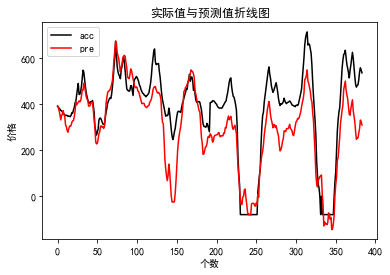

In [37]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#y_pred 预测值数据
plt.plot(acc,color=(0,0,0),label="acc") #颜色表示
plt.plot(y_cat,color="r",label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [38]:
mape=np.abs((acc-y_cat)/((acc+y_cat)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.5221526654913091


In [39]:
import lightgbm as lgb
from sklearn.model_selection import KFold, RepeatedKFold
param = {'boosting_type': 'gbdt',
         'num_leaves': 20,
         'min_data_in_leaf': 20, 
         'objective':'regression',
         'max_depth':6,
         'learning_rate': 0.01,
         "min_child_samples": 30,
         
         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 11,
         "metric": 'mse',
         "lambda_l1": 0.1,
         "verbosity": -1}
folds = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_lgb = np.zeros(len(X_train))
predictions_lgb = np.zeros(len(X_test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
   # print(trn_idx)
   # print(".............x_train.........")
   # print(X_train[trn_idx])
  #  print(".............y_train.........")
  #  print(y_train[trn_idx])
    trn_data = lgb.Dataset(X_train[trn_idx], y_train[trn_idx])
    
    val_data = lgb.Dataset(X_train[val_idx], y_train[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=200, early_stopping_rounds = 100)
    oof_lgb[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)
    
    predictions_lgb += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_lgb, y_train)))

fold n°1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
Training until validation scores don't improve for 100 rounds


D:\Application\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Application\Anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Application\Anaconda3\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[200]	training's l2: 7720.59	valid_1's l2: 8738.89
[400]	training's l2: 4095.35	valid_1's l2: 5481.55
[600]	training's l2: 2944.58	valid_1's l2: 4501.09
[800]	training's l2: 2262.64	valid_1's l2: 3928.4
[1000]	training's l2: 1780.51	valid_1's l2: 3486.1
[1200]	training's l2: 1437.35	valid_1's l2: 3174.49
[1400]	training's l2: 1178.64	valid_1's l2: 2930.49
[1600]	training's l2: 982.158	valid_1's l2: 2734.27
[1800]	training's l2: 832.279	valid_1's l2: 2579.05
[2000]	training's l2: 712.721	valid_1's l2: 2449.19
[2200]	training's l2: 616.831	valid_1's l2: 2341.87
[2400]	training's l2: 533.056	valid_1's l2: 2245.05
[2600]	training's l2: 466.8	valid_1's l2: 2167.76
[2800]	training's l2: 409.203	valid_1's l2: 2097.39
[3000]	training's l2: 360.682	valid_1's l2: 2033.07
[3200]	training's l2: 319.934	valid_1's l2: 1979.13
[3400]	training's l2: 284.196	valid_1's l2: 1930.24
[3600]	training's l2: 255.849	valid_1's l2: 1888.87
[3800]	training's l2: 229.943	valid_1's l2: 1849.93
[4000]	training's l2

[9600]	training's l2: 25.6942	valid_1's l2: 1678.24
[9800]	training's l2: 24.2042	valid_1's l2: 1674.64
[10000]	training's l2: 22.7655	valid_1's l2: 1670.65
Did not meet early stopping. Best iteration is:
[10000]	training's l2: 22.7655	valid_1's l2: 1670.65
fold n°4
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
Training until validation scores don't improve for 100 rounds
[200]	training's l2: 7674.73	valid_1's l2: 9086.47
[400]	training's l2: 4142.07	valid_1's l2: 5929.03
[600]	training's l2: 2988.32	valid_1's l2: 4922.85
[800]	training's l2: 2309.6	valid_1's l2: 4297.5
[1000]	training's l2: 1820.37	valid_1's l2: 3836.88
[1200]	training's l2: 1476.28	valid_1's l2: 3477.12
[1400]	training's l2: 1220.3	valid_1's l2: 3199.46
[1600]	training's l2: 1018.8	valid_1's l2: 2967.84
[1800]	training's l2: 862.304	valid_1's l2: 2781.82
[2000]	training's l2: 737.357	valid_1's l2: 2637.38
[2200]	training's l2: 635.316	valid_1

In [40]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print( r2_score(acc, predictions_lgb))
print ('均方差',mean_squared_error(acc,predictions_lgb))
print ('绝对差',mean_absolute_error(acc,predictions_lgb))
print ('解释度',explained_variance_score(acc,predictions_lgb))

0.598739341890051
均方差 14390.618566261595
绝对差 95.45162004922491
解释度 0.775224485048607


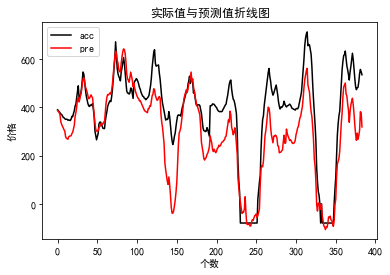

In [41]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#y_pred 预测值数据
plt.plot(acc,color=(0,0,0),label="acc") #颜色表示
plt.plot(predictions_lgb,color="r",label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [42]:
mape=np.abs((acc-predictions_lgb)/((acc+predictions_lgb)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.4282511751762028
